In [1]:
import sys
print(sys.executable)
print(sys.version)

/home/kshitij98/getNeighbours/venv/bin/python3
3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]


In [2]:
from ipynb.fs.full.Helper import getDataLoader
from ipynb.fs.full.GramMatrix import convertModel

import torch
import torch.nn as nn

%matplotlib inline

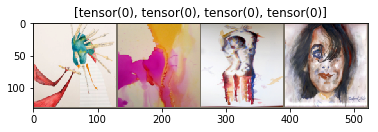

In [3]:
loader = getDataLoader('/scratch/bam_subset_2_0', batch_size=4, shuffle=False, num_workers=4, testing=True)

In [4]:
import torchvision.models as models
vgg19 = models.vgg19(pretrained=True)

In [5]:
gramMatrixLayers = ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1', 'relu5_1']
vgg19, model, gram_matrices = convertModel(vgg19, gramMatrixLayers, testing=False)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model.eval()

if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs")
    model = nn.DataParallel(model)

model.to(device)

cpu


Sequential(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU()
  (gram_matrix1_1): GramMatrixLayer()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU()
  (gram_matrix2_1): GramMatrixLayer()
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_1): ReLU()
  (gram_matrix3_1): GramMatrixLayer()
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_2): ReLU()
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_3): ReLU()
 

In [7]:
dataIter = iter(loader)
(data, classes), names = dataIter.next()
print(names)
out = model(data)

('/scratch/bam_subset_2_0/0/100059085_11339201.jpg', '/scratch/bam_subset_2_0/0/100087783_14511195.jpg', '/scratch/bam_subset_2_0/0/100106111_10623409.jpg', '/scratch/bam_subset_2_0/0/100143871_13602029.jpg')


In [8]:
print(out)

print(len(gram_matrices))

G = []
for gm in gram_matrices:
    a, b, c = gm.gramMatrix.size()
    gm.gramMatrix = gm.gramMatrix.view(a, b * c)
    G.append(gm.gramMatrix)
#     print(gm.gramMatrix.shape)
print(G)

tensor([[[[ 0.0000,  0.0000,  0.2380,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.6888,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  8.3214,  1.3663,  0.0000],
          ...,
          [ 0.0000,  0.9104,  7.1870,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 2.8614,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  2.4419,  0.9109,  0.6060],
          [ 0.2650,  0.9317,  0.0000,  ...,  9.8881,  5.1082,  2.9127],
          ...,
          [ 1.2797, 11.3276,  6.7778,  ...,  2.2732,  0.8441,  1.6285],
          [ 0.0000,  0.0000,  1.0505,  ...,  3.5707,  1.0279,  1.0044],
          [ 0.0000,  0.0000,  0.0000,  ...,  1.0393,  0.0459,  0.0000]],

         [[ 1.4705,  0.8088,  1.5983,  ...,  4.5936,  0.0000,  0.0000],
          [ 2.6069,  2.1816,  

[tensor([[0.0276, 0.0084, 0.0206,  ..., 0.0011, 0.0026, 0.0114],
        [0.0020, 0.0012, 0.0021,  ..., 0.0007, 0.0021, 0.0062],
        [0.0248, 0.0072, 0.0157,  ..., 0.0025, 0.0024, 0.0081],
        [0.0099, 0.0043, 0.0066,  ..., 0.0019, 0.0021, 0.0064]],
       grad_fn=<ViewBackward>), tensor([[0.0378, 0.0011, 0.0167,  ..., 0.0032, 0.0149, 0.0322],
        [0.0155, 0.0002, 0.0054,  ..., 0.0000, 0.0086, 0.0173],
        [0.0255, 0.0025, 0.0111,  ..., 0.0040, 0.0125, 0.0292],
        [0.0305, 0.0029, 0.0147,  ..., 0.0063, 0.0175, 0.0337]],
       grad_fn=<ViewBackward>), tensor([[0.0257, 0.0056, 0.0096,  ..., 0.0032, 0.0091, 0.0271],
        [0.0110, 0.0112, 0.0024,  ..., 0.0134, 0.0116, 0.0677],
        [0.0132, 0.0056, 0.0092,  ..., 0.0049, 0.0073, 0.0138],
        [0.0494, 0.0156, 0.0119,  ..., 0.0081, 0.0027, 0.0145]],
       grad_fn=<ViewBackward>), tensor([[0.0142, 0.0070, 0.0022,  ..., 0.0082, 0.0228, 0.0660],
        [0.0162, 0.0108, 0.0019,  ..., 0.0035, 0.0012, 0.0234],
    

In [9]:
G = torch.cat(G, 1)
print(G.shape)

torch.Size([4, 610304])


In [10]:
import time

dataIter = iter(loader)
t = time.time()
for i in range(100):
    (data, classes), names = dataIter.next()
#     print(names)
    out = model(data)
    print("ETA: ", ((time.time() - t) / ((i + 1) * 4)) * (121000 - ((i+1) * 4)) * (1 / 60), "minutes", end='\r')
#     print("ETA: ", ((time.time() - t) / ((i + 1) * 4)) * (121000 - ((i+1) * 4)), "seconds", end='\r')